# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 4
shufflePixels = False
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(20000, 32, 32, 3)
(20000, 4)
(4000, 32, 32, 3)
(4000, 4)


Populating the interactive namespace from numpy and matplotlib


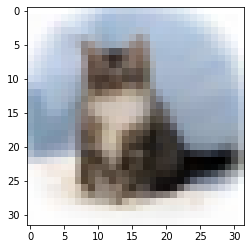

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

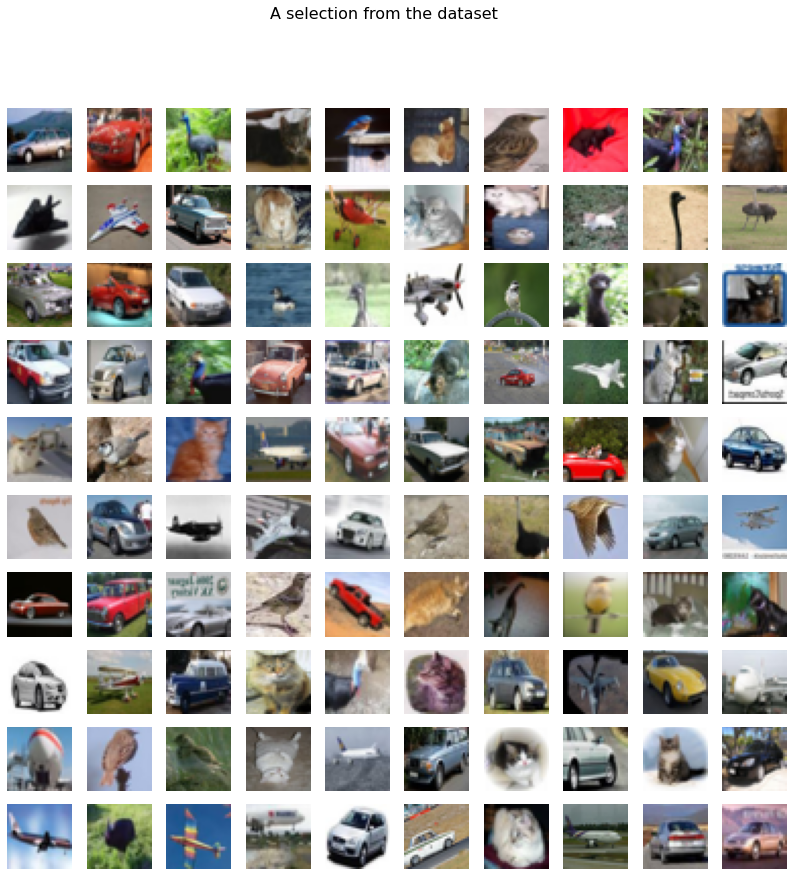

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 11s 33ms/step - loss: 1.3885 - accuracy: 0.2500
test loss, test acc: [1.3884962797164917, 0.25]
Evaluate on test data
8/8 [==============================] - 1s 176ms/step - loss: 1.3882 - accuracy: 0.2500
test loss, test acc: [1.3882291316986084, 0.25]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 8s 32ms/step - loss: 1.2727 - accuracy: 0.4017 - val_loss: 1.1616 - val_accuracy: 0.5343
Epoch 2/250
200/200 [==============================] - 6s 30ms/step - loss: 1.0499 - accuracy: 0.5490 - val_loss: 1.2407 - val_accuracy: 0.4532
Epoch 3/250
200/200 [==============================] - 6s 30ms/step - loss: 0.8680 - accuracy: 0.6403 - val_loss: 0.7779 - val_accuracy: 0.6998
Epoch 4/250
200/200 [==============================] - 6s 30ms/step - loss: 0.7560 - accuracy: 0.6877 - val_loss: 0.7000 - val_accuracy: 0.7175
Epoch 5/250
200/200 [==============================] - 6s 30ms/step - loss: 0.6746 - accuracy: 0.7280 - val_loss: 0.6122 - val_accuracy: 0.7602
Epoch 6/250
200/200 [==============================] - 6s 30ms/step - loss: 0.6168 - accuracy: 0.7571 - val_loss: 0.5947 - val_accuracy: 0.7653
Epoch 7/250
200/200 [==============================] - 6s 30ms/step - loss: 0.5613 - accuracy: 0.7821 - val_loss: 0.6819 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 1s 29ms/step - loss: 1.2643e-06 - accuracy: 1.0000
test loss, test acc: [1.2643326954275835e-06, 1.0]
Evaluate on test data
8/8 [==============================] - 0s 29ms/step - loss: 1.6045 - accuracy: 0.8447
test loss, test acc: [1.604458212852478, 0.8447499871253967]


# Small

In [12]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 1s 7ms/step - loss: 6.7703 - accuracy: 0.2521
test loss, test acc: [6.770309925079346, 0.2520500123500824]
Evaluate on test data
8/8 [==============================] - 0s 20ms/step - loss: 6.7829 - accuracy: 0.2640
test loss, test acc: [6.782866477966309, 0.2639999985694885]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 3s 8ms/step - loss: 3.5613 - accuracy: 0.4199 - val_loss: 0.9305 - val_accuracy: 0.6465
Epoch 2/250
200/200 [==============================] - 1s 7ms/step - loss: 0.9532 - accuracy: 0.6086 - val_loss: 0.7809 - val_accuracy: 0.6975
Epoch 3/250
200/200 [==============================] - 1s 7ms/step - loss: 0.8400 - accuracy: 0.6654 - val_loss: 0.6805 - val_accuracy: 0.7402
Epoch 4/250
200/200 [==============================] - 1s 7ms/step - loss: 0.7781 - accuracy: 0.6922 - val_loss: 0.6566 - val_accuracy: 0.7375
Epoch 5/250
200/200 [==============================] - 1s 7ms/step - loss: 0.7294 - accuracy: 0.7082 - val_loss: 0.6725 - val_accuracy: 0.7495
Epoch 6/250
200/200 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.7258 - val_loss: 0.6741 - val_accuracy: 0.7337
Epoch 7/250
200/200 [==============================] - 1s 7ms/step - loss: 0.6552 - accuracy: 0.7448 - val_loss: 0.6408 - val_accuracy: 0.7515

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 0s 7ms/step - loss: 0.0654 - accuracy: 0.9930
test loss, test acc: [0.06535358726978302, 0.9929999709129333]
Evaluate on test data
8/8 [==============================] - 0s 6ms/step - loss: 0.4437 - accuracy: 0.8687
test loss, test acc: [0.4436797499656677, 0.8687499761581421]


#tNet

In [16]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [17]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [18]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 3s 40ms/step - loss: 2.7816 - accuracy: 0.2500
test loss, test acc: [2.781595230102539, 0.25]
Evaluate on test data
8/8 [==============================] - 1s 118ms/step - loss: 2.7713 - accuracy: 0.2503
test loss, test acc: [2.7712974548339844, 0.2502500116825104]


In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 10s 41ms/step - loss: 1.0142 - accuracy: 0.5917 - val_loss: 0.9979 - val_accuracy: 0.6158
Epoch 2/250
200/200 [==============================] - 8s 39ms/step - loss: 0.7320 - accuracy: 0.7193 - val_loss: 0.7749 - val_accuracy: 0.6942
Epoch 3/250
200/200 [==============================] - 8s 39ms/step - loss: 0.6082 - accuracy: 0.7725 - val_loss: 0.7609 - val_accuracy: 0.6975
Epoch 4/250
200/200 [==============================] - 8s 39ms/step - loss: 0.4992 - accuracy: 0.8158 - val_loss: 0.6932 - val_accuracy: 0.7355
Epoch 5/250
200/200 [==============================] - 8s 39ms/step - loss: 0.4106 - accuracy: 0.8523 - val_loss: 0.5966 - val_accuracy: 0.7700
Epoch 6/250
200/200 [==============================] - 8s 39ms/step - loss: 0.3368 - accuracy: 0.8806 - val_loss: 0.6259 - val_accuracy: 0.7805
Epoch 7/250
200/200 [==============================] - 8s 39ms/step - loss: 0.2707 - accuracy: 0.9072 - val_loss: 0.6194 - val_accuracy

In [20]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 2s 38ms/step - loss: 0.0018 - accuracy: 0.9996
test loss, test acc: [0.001831505447626114, 0.9995999932289124]
Evaluate on test data
8/8 [==============================] - 0s 38ms/step - loss: 1.1613 - accuracy: 0.8110
test loss, test acc: [1.161303997039795, 0.8109999895095825]


# ConvNet

In [21]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [22]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 4s 49ms/step - loss: 2.3030 - accuracy: 0.2551
test loss, test acc: [2.3030123710632324, 0.2551499903202057]
Evaluate on test data
8/8 [==============================] - 2s 285ms/step - loss: 2.2921 - accuracy: 0.2553
test loss, test acc: [2.2920663356781006, 0.2552500069141388]


In [24]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 10s 40ms/step - loss: 0.8694 - accuracy: 0.6449 - val_loss: 0.8579 - val_accuracy: 0.6820
Epoch 2/250
200/200 [==============================] - 8s 39ms/step - loss: 0.6437 - accuracy: 0.7456 - val_loss: 0.6424 - val_accuracy: 0.7375
Epoch 3/250
200/200 [==============================] - 8s 39ms/step - loss: 0.5747 - accuracy: 0.7703 - val_loss: 0.6082 - val_accuracy: 0.7595
Epoch 4/250
200/200 [==============================] - 8s 39ms/step - loss: 0.5215 - accuracy: 0.7925 - val_loss: 0.5672 - val_accuracy: 0.7803
Epoch 5/250
200/200 [==============================] - 8s 39ms/step - loss: 0.4833 - accuracy: 0.8095 - val_loss: 0.5496 - val_accuracy: 0.7857
Epoch 6/250
200/200 [==============================] - 8s 39ms/step - loss: 0.4380 - accuracy: 0.8292 - val_loss: 0.4993 - val_accuracy: 0.8037
Epoch 7/250
200/200 [==============================] - 8s 39ms/step - loss: 0.4088 - accuracy: 0.8411 - val_loss: 0.4744 - val_accuracy

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 2s 45ms/step - loss: 4.4694e-05 - accuracy: 1.0000
test loss, test acc: [4.469422856345773e-05, 1.0]
Evaluate on test data
8/8 [==============================] - 0s 45ms/step - loss: 0.8786 - accuracy: 0.8860
test loss, test acc: [0.8786320686340332, 0.8859999775886536]


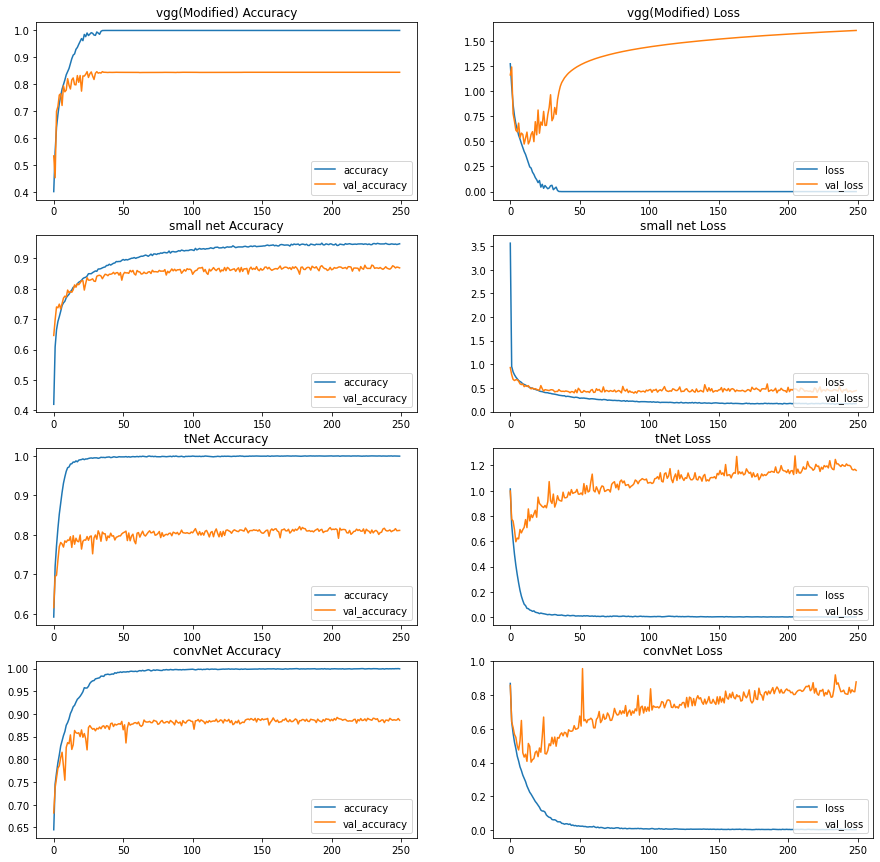

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1